# TASK # 1
Assigned: 15-07-2024 

Submission date: 30-07-2024

Topic: House Price Analysis and Prediction

Objective: Analyze a dataset of house prices to understand pricing factors, identify outliers, and develop a model for future price prediction.

# 1. Data Cleaning and Exploration:


1.1 Clean the data: Identify and handle missing values, inconsistencies,
and outliers.

In [115]:
import numpy as np
import pandas as pd

In [116]:
# Load the dataset
df = pd.read_csv(r'D:\Data_science_Projects\Task-1\zameen-updated.csv')

# Display the first few rows of the dataframe
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [117]:
# Display the first few rows to ensure data is loaded correctly
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

(   property_id  location_id  \
 0       237062         3325   
 1       346905         3236   
 2       386513          764   
 3       656161          340   
 4       841645         3226   
 
                                             page_url property_type     price  \
 0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
 1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
 2  https://www.zameen.com/Property/islamabad_g_15...         House  16500000   
 3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
 4  https://www.zameen.com/Property/dha_valley_dha...         House   7000000   
 
       location       city      province_name   latitude  longitude  baths  \
 0         G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
 1         E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   
 2         G-15  Islamabad  Islamabad Capital  33.631486  72.926559      6   
 3    

In [118]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64


In [119]:
# checking duplicates 
duplicate_rows=df[df.duplicated()]
duplicate_rows

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category


In [120]:
# Numbers of duplicate rows 
duplicate_rows= df[df.duplicated()]
num_duplicate_rows=len(duplicate_rows)
print("Number of duplicate rows:", num_duplicate_rows )

Number of duplicate rows: 0


In [121]:

#Filling the missing values of agency and agent with Unknown
df['agency'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)

C:\Users\Sadaf\AppData\Local\Temp\ipykernel_8388\665841740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agency'].fillna('Unknown', inplace=True)
C:\Users\Sadaf\AppData\Local\Temp\ipykernel_8388\665841740.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [122]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area Type        0
Area Size        0
Area Category    0
dtype: int64


In [123]:
# Ensure consistency in categorical columns
df['property_type'] = df['property_type'].str.lower()
df['location'] = df['location'].str.lower()
df['city'] = df['city'].str.lower()
df['province_name'] = df['province_name'].str.lower()
df['area'] = df['area'].str.lower()
df['purpose'] = df['purpose'].str.lower()
df['agency'] = df['agency'].str.lower()
df['agent'] = df['agent'].str.lower()
df['Area Type'] = df['Area Type'].str.lower()
df['Area Category'] = df['Area Category'].str.lower()


In [124]:
# Convert columns to appropriate data types
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['Area Size'] = pd.to_numeric(df['Area Size'], errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [125]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,flat,10000000,g-10,islamabad,islamabad capital,33.679890,73.012640,2,4 marla,for sale,2,2019-02-04,unknown,unknown,marla,4.0,0-5 marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,flat,6900000,e-11,islamabad,islamabad capital,33.700993,72.971492,3,5.6 marla,for sale,3,2019-05-04,unknown,unknown,marla,5.6,5-10 marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,house,16500000,g-15,islamabad,islamabad capital,33.631486,72.926559,6,8 marla,for sale,5,2019-07-17,unknown,unknown,marla,8.0,5-10 marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,house,43500000,bani gala,islamabad,islamabad capital,33.707573,73.151199,4,2 kanal,for sale,4,2019-04-05,unknown,unknown,kanal,2.0,1-5 kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,house,7000000,dha defence,islamabad,islamabad capital,33.492591,73.301339,3,8 marla,for sale,3,2019-07-10,easy property,muhammad junaid ceo muhammad shahid director,marla,8.0,5-10 marla


In [126]:
# Standardize Area Type
df['Area Type'] = df['Area Type'].str.strip().str.capitalize()
# Standardize Area Category
df['Area Category'] = df['Area Category'].str.strip()
df['property_type'] = df['property_type'].str.strip().str.capitalize()
df['location'] = df['location'].str.strip().str.capitalize()
df['city'] = df['city'].str.strip().str.capitalize()
df['province_name'] = df['province_name'].str.strip().str.capitalize()
df['area'] = df['area'].str.strip().str.capitalize()
df['purpose'] = df['purpose'].str.strip().str.capitalize()
df['agency'] = df['agency'].str.strip().str.capitalize()
df['agent'] = df['agent'].str.strip().str.capitalize()

In [127]:
# Define a function to find outliers using IQR
def find_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

# Identify outliers in price and Area Size
price_outliers = find_outliers_IQR(df['price'])
area_size_outliers = find_outliers_IQR(df['Area Size'])

print("Price outliers:")
print(price_outliers)

print("Area Size outliers:")
print(area_size_outliers)

Price outliers:
8          50000000
12        400000000
17         80000000
20         55000000
22         88500000
            ...    
168411    185000000
168414     82500000
168419     55000000
168427     55000000
168429    170000000
Name: price, Length: 13547, dtype: int64
Area Size outliers:
28        17.8
44        16.0
63        18.0
93        18.0
157       16.0
          ... 
168285    16.0
168302    40.0
168311    16.0
168379    17.0
168406    17.0
Name: Area Size, Length: 3326, dtype: float64


In [128]:

# Remove outliers
df = df[~df['price'].isin(price_outliers)]
df = df[~df['Area Size'].isin(area_size_outliers)]

In [129]:
#Maximum values
max_values = {'price': df['price'].max(),
              'latitude':df['latitude'].max(),
              'longitude':df['longitude'].max(),
              'baths':df['baths'].max(),
              'bedrooms':df['bedrooms'].max(),
              'Area Size':df['Area Size'].max()
              }

In [130]:

print("Maximum Values:")
for i , max_value in max_values.items():
  print(f"{i}:{max_value}")

Maximum Values:
price:48200000
latitude:73.184088
longitude:80.16143000000001
baths:403
bedrooms:68
Area Size:15.5


In [131]:
# Get unique property types
unique_property_types = df['property_type'].unique()

# Print unique property types
print("Unique property types:")
for property_type in unique_property_types:
    print(property_type)

Unique property types:
Flat
House
Penthouse
Lower portion
Upper portion
Room
Farm house


In [132]:

# Get unique city types
unique_city_types = df['city'].unique()
print("City Types:")
for city_type in unique_city_types:
  print(city_type)

City Types:
Islamabad
Lahore
Faisalabad
Rawalpindi
Karachi


In [133]:

#Get purpose
purpose_of_property = df['purpose'].unique()
print("Purpose:")
for purpose in purpose_of_property:
  print(purpose)

Purpose:
For sale
For rent


In [134]:
#Area Type
area_type = df['Area Type'].unique()
print("Area Type:")
for area in area_type:
  print(area)

Area Type:
Marla
Kanal


In [135]:
max_baths_index = df['baths'].idxmax()
# Get the row with the maximum number of baths
row_max_baths = df.loc[max_baths_index]
# Print the row
print("Row with the maximum number of baths:")
print(row_max_baths)

Row with the maximum number of baths:
property_id                                               17101832
location_id                                                    587
page_url         https://www.zameen.com/Property/rawalpindi_kha...
property_type                                                House
price                                                     15000000
location                                       Khayaban-e-sir syed
city                                                    Rawalpindi
province_name                                               Punjab
latitude                                                 33.638847
longitude                                                73.048089
baths                                                          403
area                                                       5 marla
purpose                                                   For sale
bedrooms                                                         6
date_added              

1.2 Explore the data: Analyze the distribution of house prices and other features. Identify potential relationships between features and price using visualizations (scatter plots, box plots, etc.).


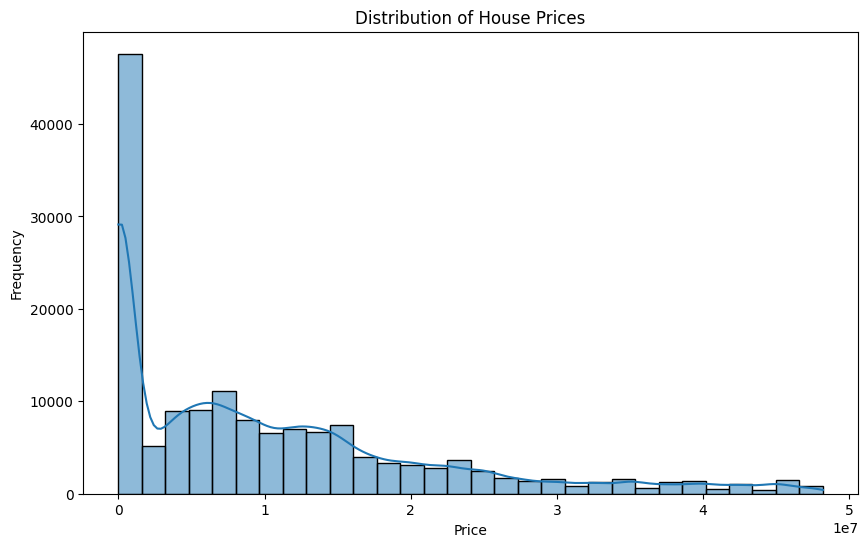

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

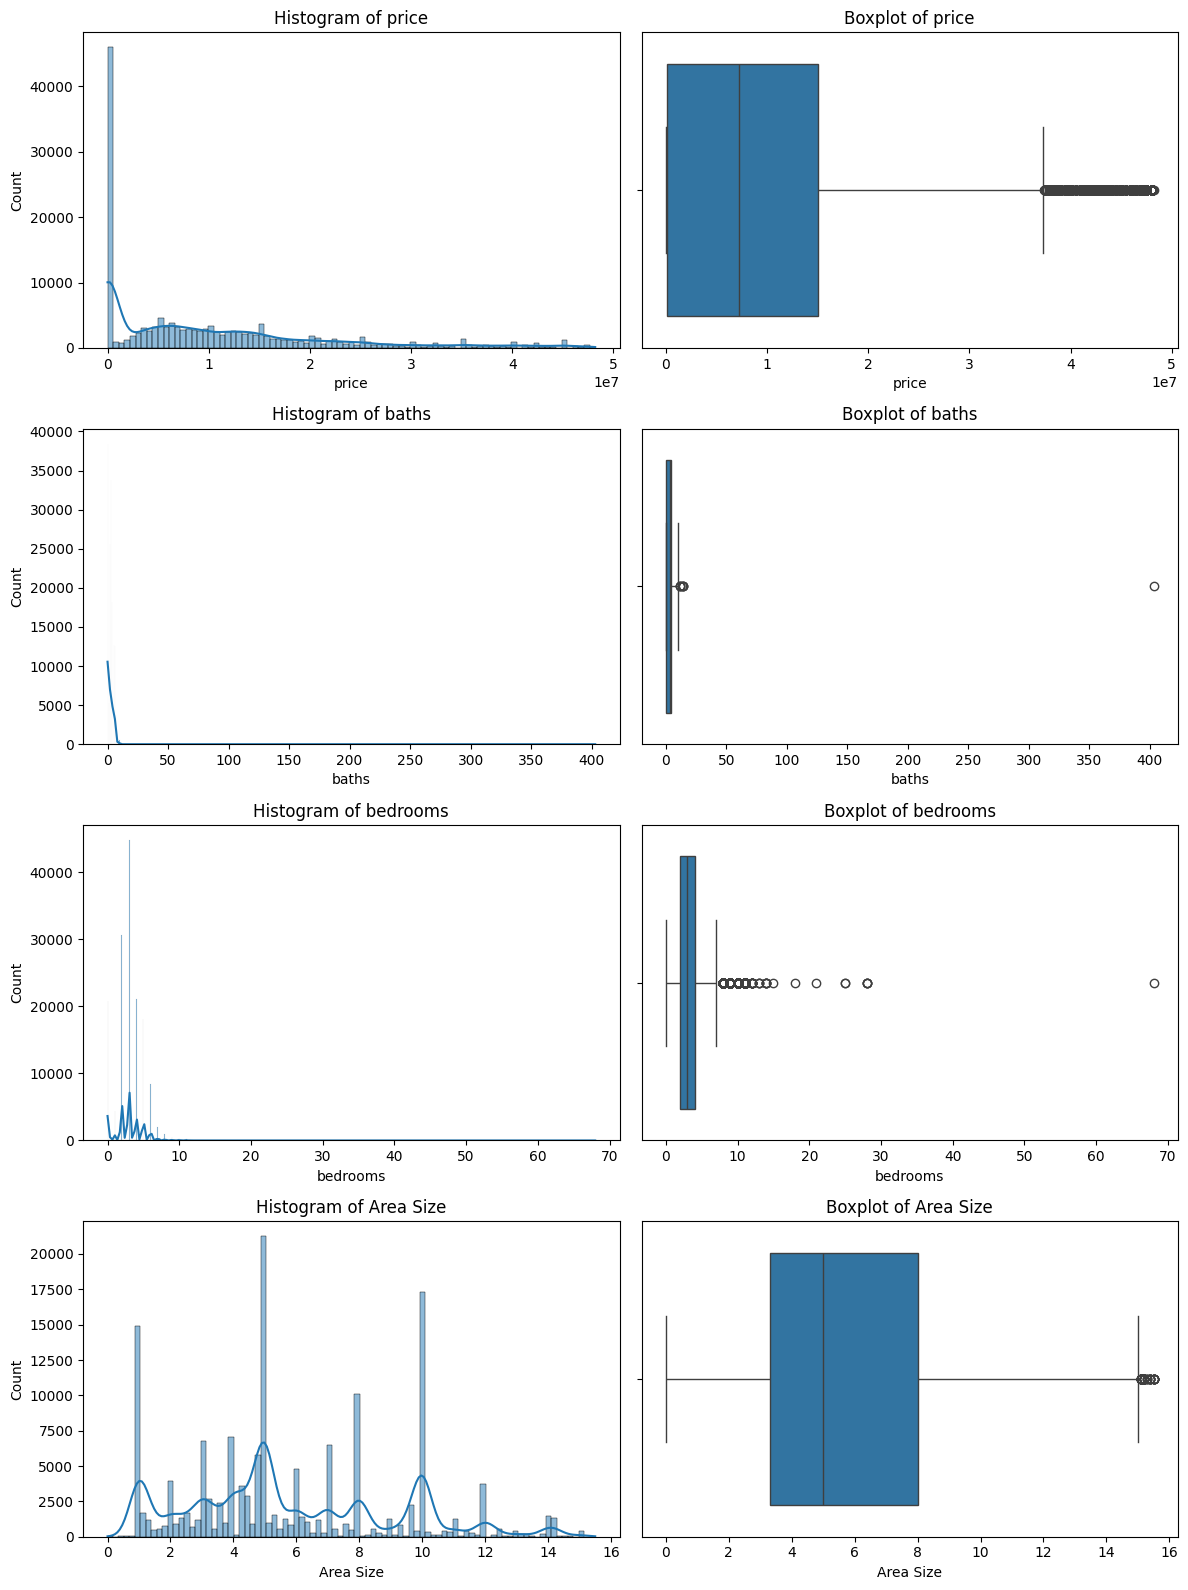

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms and box plots to identify outliers in the numerical columns
numerical_columns = ['price', 'baths', 'bedrooms', 'Area Size']

# Setting up the plotting grid
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 16))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


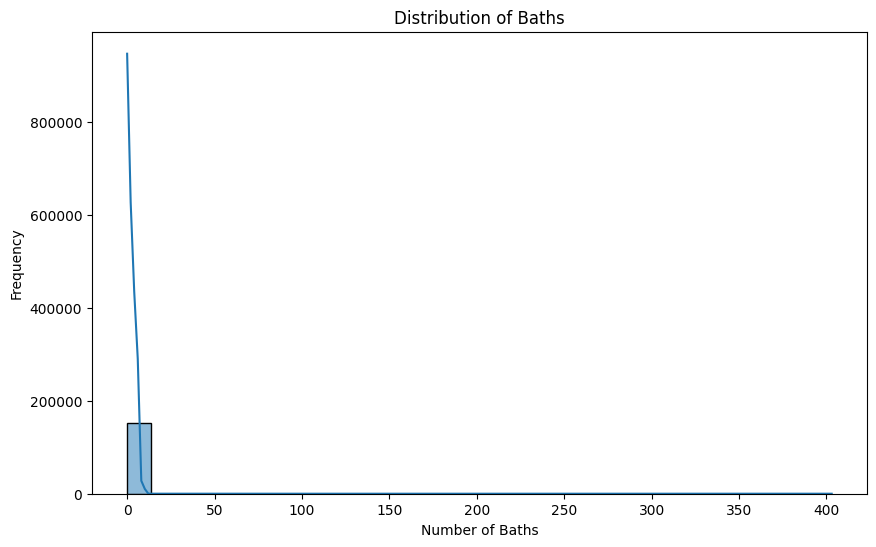

In [138]:
# Plot histogram of baths
plt.figure(figsize=(10, 6))
sns.histplot(df['baths'], kde=True, bins=30)
plt.title('Distribution of Baths')
plt.xlabel('Number of Baths')
plt.ylabel('Frequency')
plt.show()

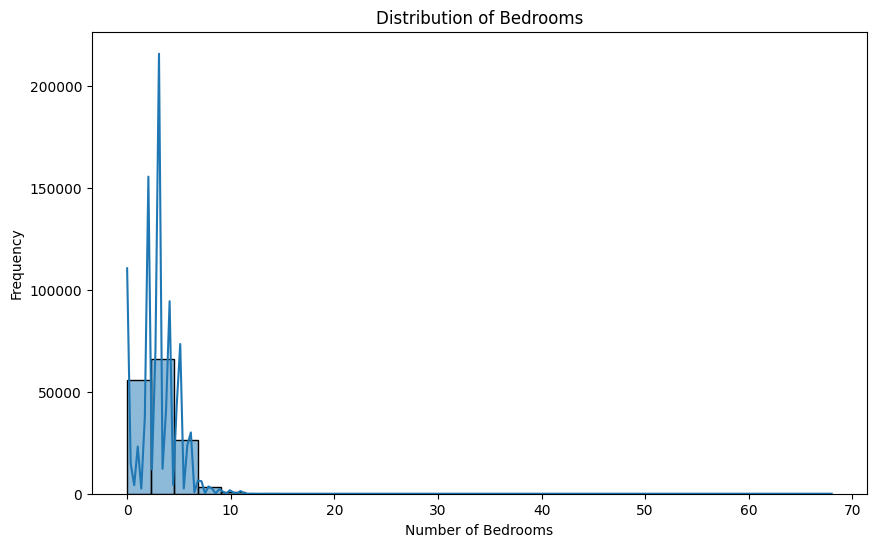

In [139]:
# Plot histogram of bedrooms
plt.figure(figsize=(10, 6))
sns.histplot(df['bedrooms'], kde=True, bins=30)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

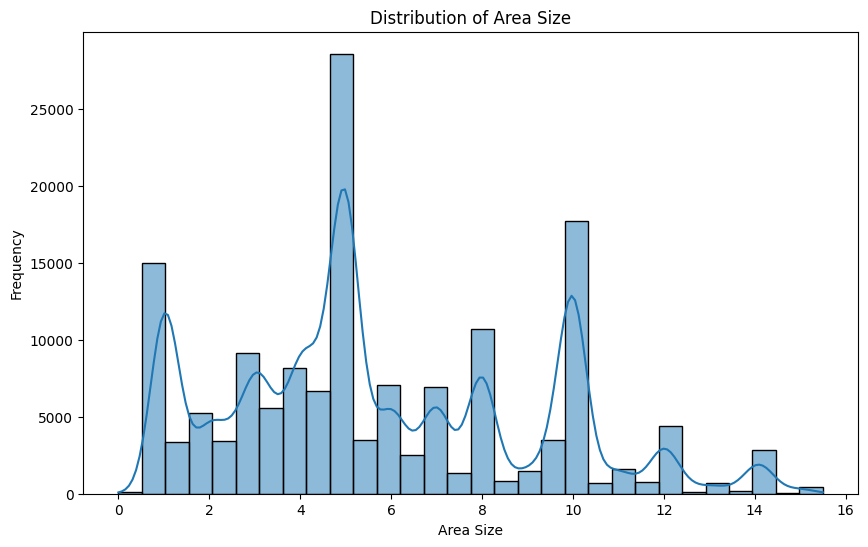

In [140]:
# Plot histogram of Area Size
plt.figure(figsize=(10, 6))
sns.histplot(df['Area Size'], kde=True, bins=30)
plt.title('Distribution of Area Size')
plt.xlabel('Area Size')
plt.ylabel('Frequency')
plt.show()

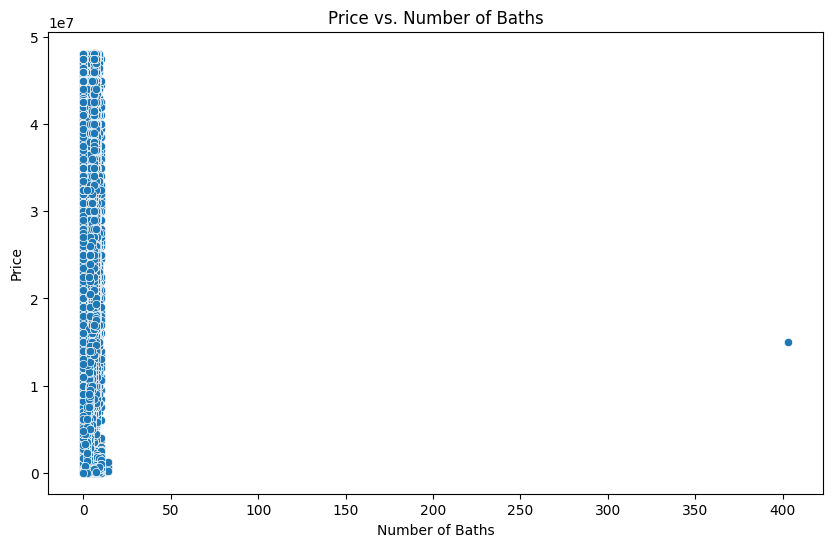

In [141]:
# Scatter plot of price vs baths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='baths', y='price', data=df)
plt.title('Price vs. Number of Baths')
plt.xlabel('Number of Baths')
plt.ylabel('Price')
plt.show()

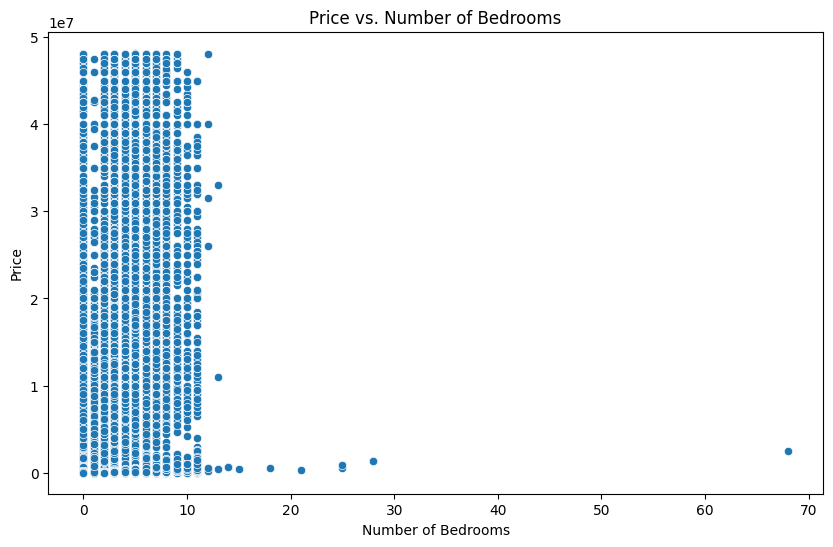

In [142]:
# Scatter plot of price vs bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

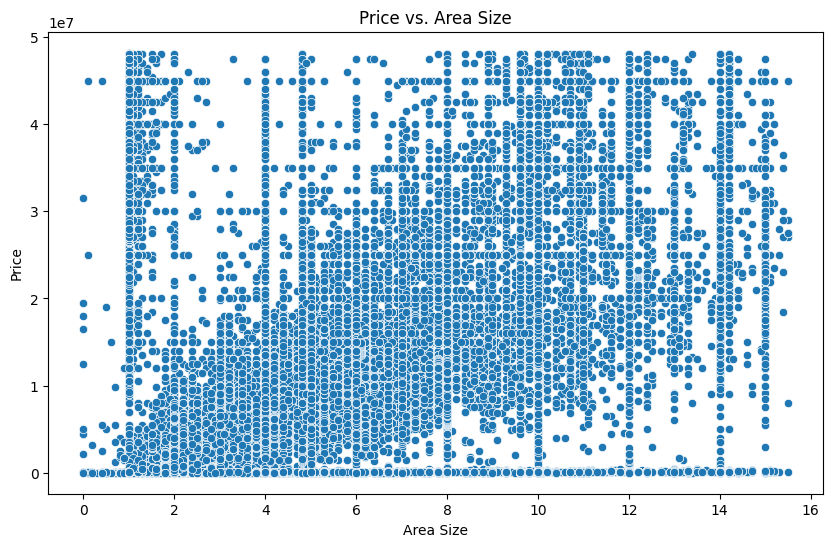

In [143]:
# Scatter plot of price vs Area Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area Size', y='price', data=df)
plt.title('Price vs. Area Size')
plt.xlabel('Area Size')
plt.ylabel('Price')
plt.show()

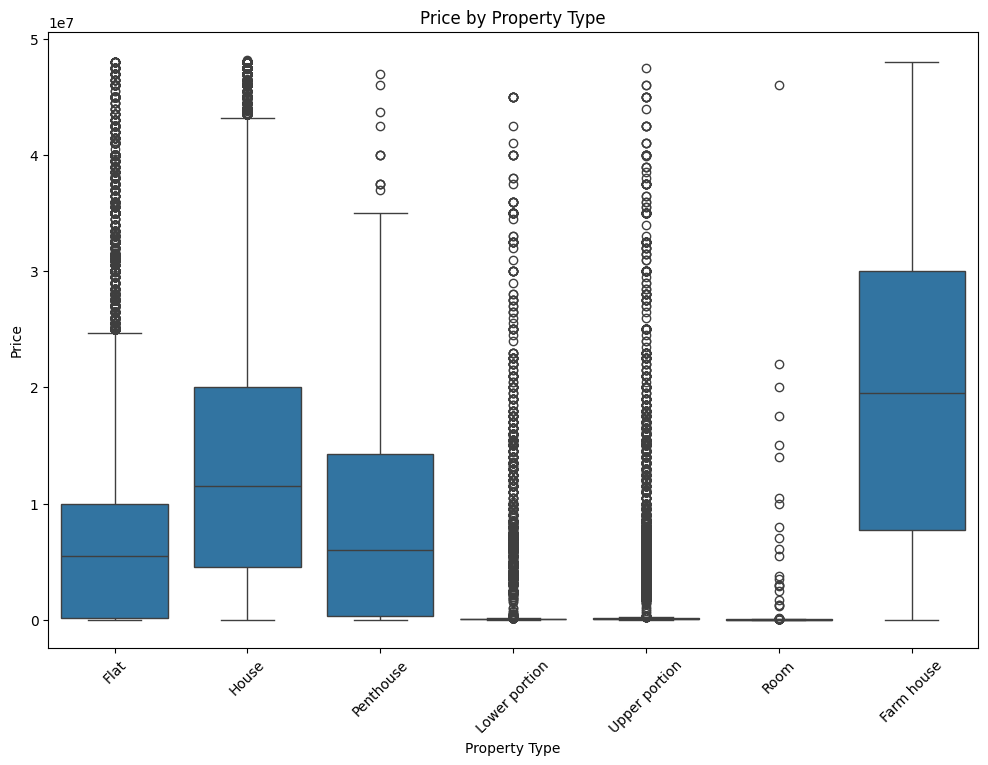

In [144]:
# Box plot of price by property type
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='price', data=df)
plt.title('Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# 2. Feature Engineering:


2.1 Create new features that might be relevant for price prediction (e.g.,
age of the house, number of bedrooms per floor).

In [145]:
# Create New Features

# Total Number of Rooms
df['total_rooms'] = df['bedrooms'] + df['baths']

In [146]:
# Price per Area Unit
df['price_per_area_unit'] = df['price'] / df['Area Size']


2.2 Consider encoding categorical features (e.g., location) into numerical values suitable for modeling.


In [147]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [148]:
# Encode 'location'
df['location_encoded'] = label_encoder.fit_transform(df['location'])

In [149]:
# Encode 'city'
df['city_encoded'] = label_encoder.fit_transform(df['city'])

In [150]:
# Encode 'province_name'
df['province_name_encoded'] = label_encoder.fit_transform(df['province_name'])

In [151]:
# Encode 'property_type'
df['property_type_encoded'] = label_encoder.fit_transform(df['property_type'])


# 3. Outlier Analysis:


3.1 Identify houses with significantly higher or lower prices compared to
similar properties.


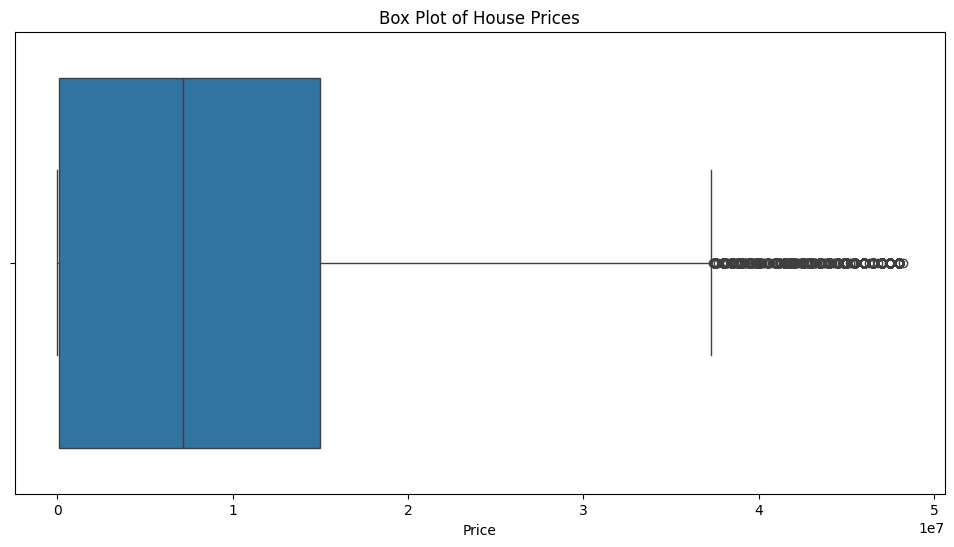

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Identify Outliers

# Box Plot for Price
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()

In [153]:
# Z-Score Method
from scipy.stats import zscore

df['price_zscore'] = zscore(df['price'])

# Define a threshold for identifying outliers (e.g., |z| > 3)
outliers = df[np.abs(df['price_zscore']) > 3]

print("Outliers based on price:")
print(outliers[['property_id', 'price', 'location', 'baths', 'bedrooms', 'Area Size', 'property_type']])
     

Outliers based on price:
        property_id     price            location  baths  bedrooms  Area Size  \
11          1586658  48000000  Diplomatic enclave      2         2        7.8   
23          2682075  47000000  Diplomatic enclave      2         3        8.4   
67          2311887  45000000              Askari      6         5        1.0   
91          3463063  47500000         Eme society      0         0        1.0   
171         2478189  45000000         Bath island      0         3        8.9   
...             ...       ...                 ...    ...       ...        ...   
168193     17353657  45000000         Dha defence      6         5        1.0   
168247     17354062  45000000         Bahria town      6         6        1.0   
168357     17355045  47500000         Dha defence      6         5        1.0   
168375     17355743  45000000         Dha defence      6         5        1.0   
168382     17356163  45000000         Dha defence      5         5        1.0   

  

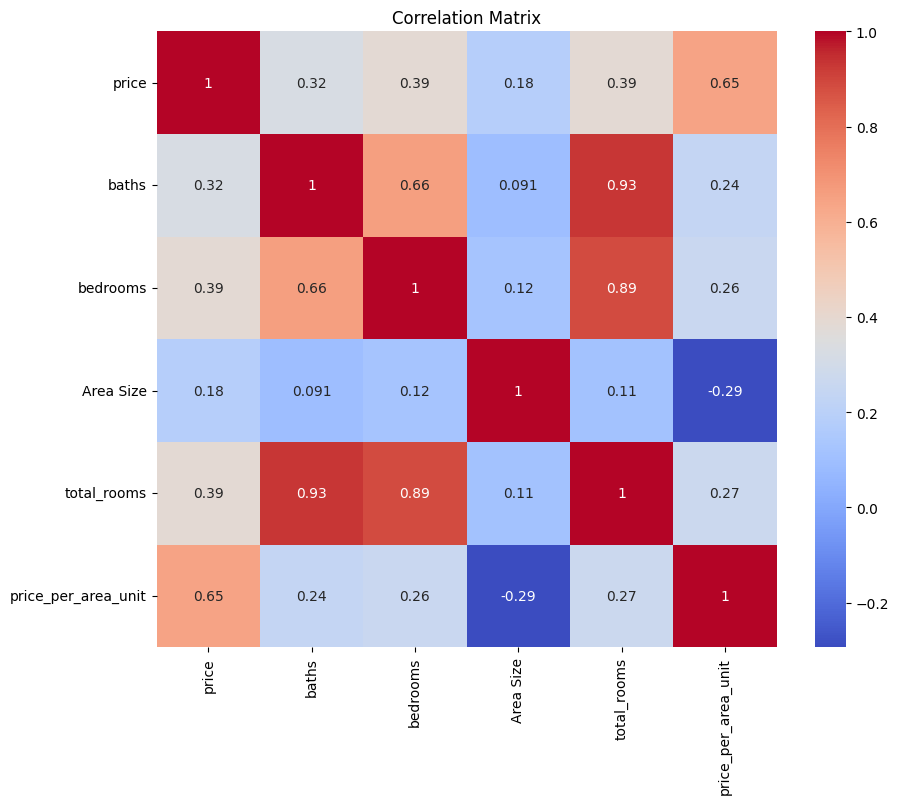

In [154]:

# Correlation Analysis
correlation_matrix = df[['price', 'baths', 'bedrooms', 'Area Size', 'total_rooms', 'price_per_area_unit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

3.2 Investigate the reasons for these outliers. Are there any specific features or combinations of features that contribute to the outliers?

In [155]:
# Investigate specific outliers
for index, row in outliers.iterrows():
    print(f"Property ID: {row['property_id']}")
    print(f"Price: {row['price']}")
    print(f"Location: {row['location']}")
    print(f"Baths: {row['baths']}")
    print(f"Bedrooms: {row['bedrooms']}")
    print(f"Area Size: {row['Area Size']}")
    print(f"Property Type: {row['property_type']}")
    print(f"Total Rooms: {row['total_rooms']}")
    print(f"Price per Area Unit: {row['price_per_area_unit']}")
    print("\n")

Property ID: 1586658
Price: 48000000
Location: Diplomatic enclave
Baths: 2
Bedrooms: 2
Area Size: 7.8
Property Type: Flat
Total Rooms: 4
Price per Area Unit: 6153846.153846154


Property ID: 2682075
Price: 47000000
Location: Diplomatic enclave
Baths: 2
Bedrooms: 3
Area Size: 8.4
Property Type: Flat
Total Rooms: 5
Price per Area Unit: 5595238.095238095


Property ID: 2311887
Price: 45000000
Location: Askari
Baths: 6
Bedrooms: 5
Area Size: 1.0
Property Type: House
Total Rooms: 11
Price per Area Unit: 45000000.0


Property ID: 3463063
Price: 47500000
Location: Eme society
Baths: 0
Bedrooms: 0
Area Size: 1.0
Property Type: House
Total Rooms: 0
Price per Area Unit: 47500000.0


Property ID: 2478189
Price: 45000000
Location: Bath island
Baths: 0
Bedrooms: 3
Area Size: 8.9
Property Type: Flat
Total Rooms: 3
Price per Area Unit: 5056179.775280898


Property ID: 3594284
Price: 45000000
Location: Dha defence
Baths: 4
Bedrooms: 3
Area Size: 9.7
Property Type: Flat
Total Rooms: 7
Price per Area Un

# 4. Predictive Modeling:

4.1 Train a machine learning model to predict house prices based on the
available features. Popular choices for this task include linear
regression, random forest, or gradient boosting.

In [156]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['baths', 'bedrooms', 'Area Size', 'total_rooms', 'price_per_area_unit',
            'location_encoded', 'city_encoded', 'province_name_encoded', 'property_type_encoded']
target = 'price'

In [157]:
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# Check for missing values
missing_values = X_train.isnull().sum()
print("Missing values in training set:\n", missing_values)

missing_values_test = X_test.isnull().sum()
print("Missing values in testing set:\n", missing_values_test)

Missing values in training set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      0
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64
Missing values in testing set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      0
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [159]:
# Impute missing values with the median of each column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())
     

In [160]:
# Check for infinite values
inf_values = np.isinf(X_train).sum()
print("Infinite values in training set:\n", inf_values)

inf_values_test = np.isinf(X_test).sum()
print("Infinite values in testing set:\n", inf_values_test)

# Replace infinite values with a large finite number (if any)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute the newly introduced NaN values (from replacing infinite values)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

Infinite values in training set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      9
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64
Infinite values in testing set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      3
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [161]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [163]:
# Select features and target variable
features = ['baths', 'bedrooms', 'Area Size', 'total_rooms', 'price_per_area_unit',
            'location_encoded', 'city_encoded', 'province_name_encoded', 'property_type_encoded']
target = 'price'

X = df[features]
y = df[target]

In [164]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
# Check for missing values
missing_values = X_train.isnull().sum()
print("Missing values in training set:\n", missing_values)


Missing values in training set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      0
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [166]:
# Impute missing values with the median of each column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [167]:
# Check for infinite values
inf_values = np.isinf(X_train).sum()
print("Infinite values in training set:\n", inf_values)

Infinite values in training set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      9
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [168]:
inf_values_test = np.isinf(X_test).sum()
print("Infinite values in testing set:\n", inf_values_test)

Infinite values in testing set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      3
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [169]:
# Replace infinite values with a large finite number (if any)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

In [170]:
# Impute the newly introduced NaN values (from replacing infinite values)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

In [171]:
# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [173]:
# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train) 
gb_model.fit(X_train_scaled, y_train)


GradientBoostingRegressor(random_state=42)

In [174]:
# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test_scaled)

In [175]:
# Evaluate models
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

In [176]:
lr_r2 = r2_score(y_test, lr_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

4.2 Evaluate the performance of the model using appropriate metrics (e.g.,
mean squared error, R-squared).


In [177]:
# Print evaluation metrics
print("Linear Regression - Mean Squared Error:", lr_mse)
print("Linear Regression - R-squared:", lr_r2)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

print("Gradient Boosting - Mean Squared Error:", gb_mse)
print("Gradient Boosting - R-squared:", gb_r2)
     

Linear Regression - Mean Squared Error: 46310379324698.766
Linear Regression - R-squared: 0.6371940071924926
Random Forest - Mean Squared Error: 44134981742.0556
Random Forest - R-squared: 0.9996542365642009
Gradient Boosting - Mean Squared Error: 481510982805.50134
Gradient Boosting - R-squared: 0.9962277339829239


# 5. Future Price Prediction:

5.5 Use the trained model to predict future house prices based on
hypothetical scenarios (e.g., what would be the price of a house with
specific characteristics in a particular location?)

In [178]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [179]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Define the new data
new_data = pd.DataFrame({
    'property_type': ['Flat'],
    'location_id': [1234],
    'city': ['Islamabad'],
    'province_name': ['Islamabad Capital'],
    'latitude': [33.6844],
    'longitude': [73.0479],
    'baths': [3],
    'bedrooms': [3],
    'area': ['5 Marla'],
    'purpose': ['For Sale'],
    'Area Type': ['Marla'],
    'Area Size': [5.0],
    # Add all other necessary features
})

# Feature engineering (if any was done during training)
# new_data['total_rooms'] = new_data['bedrooms'] + new_data['baths']

# Encode categorical features
new_data_encoded = pd.get_dummies(new_data, columns=['property_type', 'city', 'province_name', 'area', 'purpose', 'Area Type'])

# Align columns with the training data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Apply scaler if one was used during training
# Ensure the scaler was fitted on X_train
if 'scaler' in locals():
    new_data_encoded_scaled = scaler.transform(new_data_encoded)
    new_data_encoded = pd.DataFrame(new_data_encoded_scaled, columns=X_train.columns)

# Check the shape of new_data_encoded
print(new_data_encoded.shape)
print(new_data_encoded.head())

# Predict using the trained model (ensure the model is defined)
if 'random_forest_model' in locals():
    predicted_prices = random_forest_model.predict(new_data_encoded)
    # Output the predicted prices
    print("Predicted Prices:", predicted_prices)
else:
    print("Error: The random_forest_model is not defined.")


(1, 9)
      baths  bedrooms  Area Size  total_rooms  price_per_area_unit  \
0  0.113067 -0.005898  -0.244245    -1.476365             -0.39376   

   location_encoded  city_encoded  province_name_encoded  \
0         -1.536711     -2.009295              -1.498248   

   property_type_encoded  
0              -1.649845  
Predicted Prices: [1853.62]


In [180]:
print(new_data_encoded.columns)
new_data_encoded = pd.get_dummies(new_data, drop_first=True) # drop_first avoids the dummy variable trap
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)


Index(['baths', 'bedrooms', 'Area Size', 'total_rooms', 'price_per_area_unit',
       'location_encoded', 'city_encoded', 'province_name_encoded',
       'property_type_encoded'],
      dtype='object')


In [181]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

new_data = pd.DataFrame({
    'property_type': ['Flat'],
    'location_id': [1234],
    'city': ['Islamabad'],
    'province_name': ['Islamabad Capital'],
    'latitude': [33.6844],
    'longitude': [73.0479],
    'baths': [3],
    'bedrooms': [3],
    'area': ['5 Marla'],
    'purpose': ['For Sale'],
    'Area Type': ['Marla'],
    'Area Size': [5.0],
    # Add all other necessary features
})

# Encode categorical features
new_data_encoded = pd.get_dummies(new_data, columns=['property_type', 'city', 'province_name', 'area', 'purpose', 'Area Type'])

# Align columns with the training data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Check for any missing or extra columns
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
extra_cols = set(new_data_encoded.columns) - set(X_train.columns)

print("Missing columns:", missing_cols)
print("Extra columns:", extra_cols)

# Check the shape of new_data_encoded
print(new_data_encoded.shape)
print(new_data_encoded.head())

# Predict using the trained model
predicted_prices = random_forest_model.predict(new_data_encoded)

# Output the predicted prices
print("Predicted Prices:", predicted_prices)


Missing columns: set()
Extra columns: set()
(1, 9)
   baths  bedrooms  Area Size  total_rooms  price_per_area_unit  \
0      3         3        5.0            0                    0   

   location_encoded  city_encoded  province_name_encoded  \
0                 0             0                      0   

   property_type_encoded  
0                      0  
Predicted Prices: [1855.7]


Save analysis

In [185]:
new_data_encoded.to_csv('transformed_data.csv', index=False)


In [186]:
predicted_prices = random_forest_model.predict(new_data_encoded)
predictions_df = pd.DataFrame(predicted_prices, columns=['Predicted Prices'])
predictions_df.to_csv('predicted_prices.csv', index=False)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Predicted Prices


In [ ]:
new_data_encoded['Predicted Prices'] = predicted_prices
new_data_encoded.to_csv('encoded_data_with_predictions.csv', index=False)
